<a href="https://colab.research.google.com/github/capofwesh20/Masters-Thesis/blob/main/TEST_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries to import**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import os
import ipywidgets as widgets
import random
from IPython.display import display
from PIL import Image, ImageOps
import tifffile as tiff
from skimage.metrics import structural_similarity as compare_ssim
from ipywidgets import widgets, interactive
import plotly.graph_objects as go
import glob
from scipy.stats import pearsonr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import structural_similarity as compare_ssim
from keras.models import load_model
from sklearn.metrics import mean_squared_error

# **LOADING MODEL**

Load the selected model. This model can be accessed [here](https://drive.google.com/file/d/1dw5tvUeszrgps44Gyq7dut1yWsNib01W/view?usp=sharing)

In [3]:
model = load_model('/content/best optimized model.keras')

# **VISUALIZING LAB TEST DATA**

Folders of the test file are accessed from


1.   2024-02-29-SCC74A Low O2
2.   2024-02-29 SCC74A High O2 - thresh 27




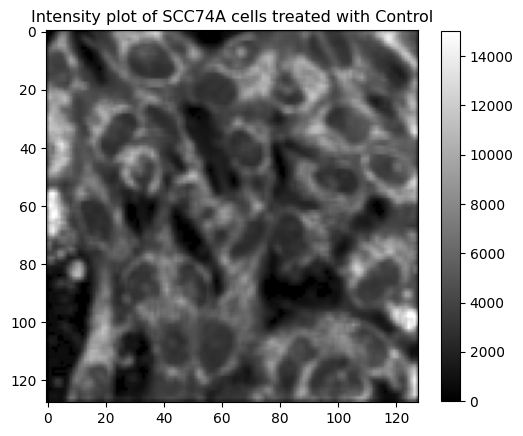

In [ ]:
# Load the image
control_1 = np.load('/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/masked_npyfile1.npy')

# # Sum the intensities along the depth axis to create a 2D projection
intensity = control_1.sum(axis=2)
# Plot the normalized intensity projection
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='grey', vmin=0, vmax=15000)
plt.colorbar(shrink=0.8)
plt.title('Intensity plot of SCC74A cells treated with Control', fontsize=11.5)

plt.show()


In [ ]:
# # Extract the decay data for pixel (191, 213)
# pixel_decay_data_127_127 = control_1[0, 4, :]

# # Plot the decay graph for pixel (127, 127)
# plt.figure(figsize=(10, 6))
# plt.plot(pixel_decay_data_127_127)
# plt.xlabel('Sample Number',fontsize=18)
# plt.ylabel('Fluorescence Intensity',fontsize=18)
# plt.title('Fluorescence Decay Curve of FCCP- at Pixel (10, 6)', fontsize=18)
# plt.grid(True)
# plt.show()


In [ ]:
control_1.shape

(128, 128, 256)

**Checking the Maximum and Minimum Pixel value**

# **Creating Tiles**

In [ ]:
def create_tcspc_image_tiles(img, nx, ny):
    # cut up a tcspc image (numpy array) and produce a list of smaller (nx x ny) tcspc image tiles
    h, w, d = img.shape
    image_tiles = [img[i*h//ny:(i+1)*h//ny, j*w//nx:(j+1)*w//nx]
                   for i in range(ny)
                   for j in range(nx)]
    return image_tiles

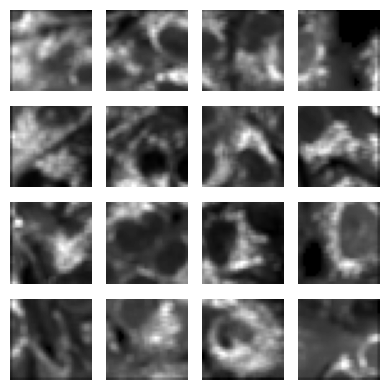

In [ ]:

tiles = create_tcspc_image_tiles(control_1, 4, 4)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(4, 4))

# Iterate over the tiles and the axes to plot
for ax, tile in zip(axes.ravel(), tiles):
    intensity = tile.sum(axis=2)
    ax.imshow(intensity, cmap='grey')
    ax.axis('off')

plt.tight_layout()
plt.show()



# **Performing Interference**

# **Performing Inference on the first tile**

# **Setting the shape in a format that the model accepts**

In [ ]:
# Assuming 'normalized_lab_images' is a list of images
predictions = [model.predict(image.reshape(1, 32, 32, 256, 1)) for image in tiles]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


In [ ]:
#predictions

In [ ]:
len(predictions)

16

In [ ]:
t1P_0 = predictions[0][0] # Predicted t1 values
t2P_0 = predictions[0][1] # Predicted t2 values
tRP_0 = predictions[0][2] # Predicted A1 values
off_0 = predictions[0][3] # Predicted offset values
offlay_0 = predictions[0][4] # Predicted  real offset values

In [ ]:
t1P_1 = predictions[1][0] # Predicted t1 values
t2P_1 = predictions[1][1] # Predicted t2 values
tRP_1 = predictions[1][2] # Predicted AR values
off_1 = predictions[1][3] # Predicted offset values
offlay_1 = predictions[1][4] # Predicted  real offset values

In [ ]:
t1P_2 = predictions[2][0] # Predicted t1 values
t2P_2 = predictions[2][1] # Predicted t2 values
tRP_2 = predictions[2][2] # Predicted AR values
off_2 = predictions[2][3] # Predicted offset values
offlay_2 = predictions[2][4] # Predicted  real offset values

In [ ]:
t1P_3 = predictions[3][0] # Predicted t1 values
t2P_3 = predictions[3][1] # Predicted t2 values
tRP_3 = predictions[3][2] # Predicted AR values
off_3 = predictions[3][3] # Predicted offset values
offlay_3 = predictions[3][4] # Predicted  real offset values

In [ ]:
t1P_4 = predictions[4][0] # Predicted t1 values
t2P_4 = predictions[4][1] # Predicted t2 values
tRP_4 = predictions[4][2] # Predicted AR values
off_4 = predictions[4][3] # Predicted offset values
offlay_4 = predictions[4][4] # Predicted  real offset values

In [ ]:
t1P_5 = predictions[5][0] # Predicted t1 values
t2P_5 = predictions[5][1] # Predicted t2 values
tRP_5 = predictions[5][2] # Predicted AR values
off_5 = predictions[5][3] # Predicted offset values
offlay_5 = predictions[5][4] # Predicted  real offset values

In [ ]:
t1P_6 = predictions[6][0] # Predicted t1 values
t2P_6 = predictions[6][1] # Predicted t2 values
tRP_6 = predictions[6][2] # Predicted AR values
off_6 = predictions[6][3] # Predicted offset values
offlay_6 = predictions[6][4] # Predicted  real offset values

In [ ]:
t1P_7 = predictions[7][0] # Predicted t1 values
t2P_7 = predictions[7][1] # Predicted t2 values
tRP_7 = predictions[7][2] # Predicted AR values
off_7 = predictions[7][3] # Predicted offset values
offlay_7 = predictions[7][4] # Predicted  real offset values

In [ ]:
t1P_8 = predictions[8][0] # Predicted t1 values
t2P_8 = predictions[8][1] # Predicted t2 values
tRP_8 = predictions[8][2] # Predicted AR values
off_8 = predictions[8][3] # Predicted offset values
offlay_8 = predictions[8][4] # Predicted  real offset values

In [ ]:
t1P_9 = predictions[9][0] # Predicted t1 values
t2P_9 = predictions[9][1] # Predicted t2 values
tRP_9 = predictions[9][2] # Predicted AR values
off_9 = predictions[9][3] # Predicted offset values
offlay_9 = predictions[9][4] # Predicted  real offset values

In [ ]:
t1P_10 = predictions[10][0] # Predicted t1 values
t2P_10 = predictions[10][1] # Predicted t2 values
tRP_10 = predictions[10][2] # Predicted AR values
off_10 = predictions[10][3] # Predicted offset values
offlay_10 = predictions[10][4] # Predicted  real offset values

In [ ]:
t1P_11 = predictions[11][0] # Predicted t1 values
t2P_11 = predictions[11][1] # Predicted t2 values
tRP_11 = predictions[11][2] # Predicted AR values
off_11 = predictions[11][3] # Predicted offset values
offlay_11 = predictions[11][4] # Predicted  real offset values

In [ ]:
t1P_12 = predictions[12][0] # Predicted t1 values
t2P_12 = predictions[12][1] # Predicted t2 values
tRP_12 = predictions[12][2] # Predicted AR values
off_12 = predictions[12][3] # Predicted offset values
offlay_12 = predictions[12][4] # Predicted  real offset values

In [ ]:
t1P_13 = predictions[13][0] # Predicted t1 values
t2P_13 = predictions[13][1] # Predicted t2 values
tRP_13 = predictions[13][2] # Predicted AR values
off_13 = predictions[13][3] # Predicted offset values
offlay_13 = predictions[13][4] # Predicted  real offset values

In [ ]:
t1P_14 = predictions[14][0] # Predicted t1 values
t2P_14 = predictions[14][1] # Predicted t2 values
tRP_14 = predictions[14][2] # Predicted AR values
off_14 = predictions[14][3] # Predicted offset values
offlay_14 = predictions[14][4] # Predicted  real offset values

In [ ]:
t1P_15 = predictions[15][0] # Predicted t1 values
t2P_15 = predictions[15][1] # Predicted t2 values
tRP_15 = predictions[15][2] # Predicted AR values
off_15 = predictions[15][3] # Predicted offset values
offlay_15 = predictions[15][4] # Predicted  real offset values

# **Stitching back the Tiles**

In [ ]:

def stitch_image_tiles(tiles, nx, ny):

    tile_height, tile_width = squeezed_tiles_t1P[0].shape
    h = tile_height * ny
    w = tile_width * nx
    stitched_image = np.zeros((h, w), dtype=tiles[0].dtype)

    for i in range(ny):
        for j in range(nx):
            start_row = i * tile_height
            end_row = start_row + tile_height
            start_col = j * tile_width
            end_col = start_col + tile_width
            stitched_image[start_row:end_row, start_col:end_col] = tiles[i*nx + j]

    return stitched_image



In [ ]:


# Create a list of your tiles
tiles = [t1P_0, t1P_1, t1P_2, t1P_3, t1P_4, t1P_5, t1P_6, t1P_7,
         t1P_8, t1P_9, t1P_10, t1P_11, t1P_12, t1P_13, t1P_14, t1P_15]

# Use a list comprehension to squeeze all tiles
squeezed_tiles_t1P = [tile.squeeze() for tile in tiles]



In [ ]:

tiles_2 = [t2P_0, t2P_1, t2P_2, t2P_3, t2P_4, t2P_5, t2P_6, t2P_7,
         t2P_8, t2P_9, t2P_10, t2P_11, t2P_12, t2P_13, t2P_14, t2P_15]

# Use a list comprehension to squeeze all tiles
squeezed_tiles_t2P = [tile.squeeze() for tile in tiles_2]


In [ ]:

tiles_3 = [tRP_0, tRP_1, tRP_2, tRP_3, tRP_4, tRP_5, tRP_6, tRP_7,
         tRP_8, tRP_9, tRP_10, tRP_11, tRP_12, tRP_13, tRP_14, tRP_15]

# Use a list comprehension to squeeze all tiles
squeezed_tiles_tRP = [tile.squeeze() for tile in tiles_3]


In [ ]:
tiles_4 = [off_0, off_1, off_2, off_3, off_4, off_5, off_6, off_7,
         off_8, off_9, off_10, off_11, off_12, off_13, off_14, off_15]

squeezed_tiles_off = [tile.squeeze() for tile in tiles_4]

In [ ]:
tiles_5 = [offlay_0, offlay_1, offlay_2, offlay_3, offlay_4, offlay_5, offlay_6, offlay_7,
           offlay_8, offlay_9, offlay_10, offlay_11, offlay_12, offlay_13, offlay_14, offlay_15]

squeezed_tiles_offlay = [tile.squeeze() for tile in tiles_5]

In [ ]:
stitched_image_1 = stitch_image_tiles(squeezed_tiles_t1P, 4, 4)

In [ ]:
stitched_image_2 = stitch_image_tiles(squeezed_tiles_t2P, 4, 4)

In [ ]:
stitched_image_3 = stitch_image_tiles(squeezed_tiles_tRP, 4, 4)

In [ ]:
stitched_image_4 = stitch_image_tiles(squeezed_tiles_off, 4, 4)

In [ ]:
stitched_image_5 = stitch_image_tiles(squeezed_tiles_offlay, 4, 4)

**Load lifetime parameters from SPCImage**

In [ ]:
loaded_data = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot_masked3_t1.npy')
#loaded_data = loaded_data/1000
print(loaded_data)


In [ ]:
loaded_data_2 = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot_masked3_t2.npy')
#loaded_data_2 = loaded_data_2/1000
print(loaded_data_2)

In [ ]:
loaded_data_a1 = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot_normalized3_a1.npy')
#loaded_data_a1 = loaded_data_a1/100
loaded_data_a1

In [ ]:
loaded_data_a2 = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot_normalized3_a2.npy')
#loaded_data_a1 = loaded_data_a1/100
loaded_data_a2

In [ ]:
loaded_data_offset = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F+-_normalized3_offset.npy')
loaded_data_offset

Visualize $\tau_1$


In [ ]:

fig = plt.figure(figsize=(10,10))

# Predicted tau1
ax1 = fig.add_subplot(3,2,1)
im1 = ax1.imshow(stitched_image_1, cmap='viridis', interpolation='nearest', vmin=.2, vmax=.6)
ax1.set_title(r'Predicted $\tau_1$ (ns)', fontsize = 16)
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# G.T. tau1
ax2 = fig.add_subplot(3,2,2)
im2 = ax2.imshow(loaded_data, cmap='viridis', interpolation='nearest', vmin=.2, vmax=.6)
ax2.set_title(r'$\tau_1$ from Fitting (ns)', fontsize = 16)
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)



plt.tight_layout()
plt.show()


Compare $\tau_1$ Similarity


In [ ]:
stitched_image_1 = stitched_image_1.astype(np.float64)  # Convert im1 to float64

ssim_score = compare_ssim(loaded_data, stitched_image_1, data_range=loaded_data.max() - loaded_data.min())

print(f"SSIM for the image is: {ssim_score}")



SSIM for the image is: 0.698067340921246


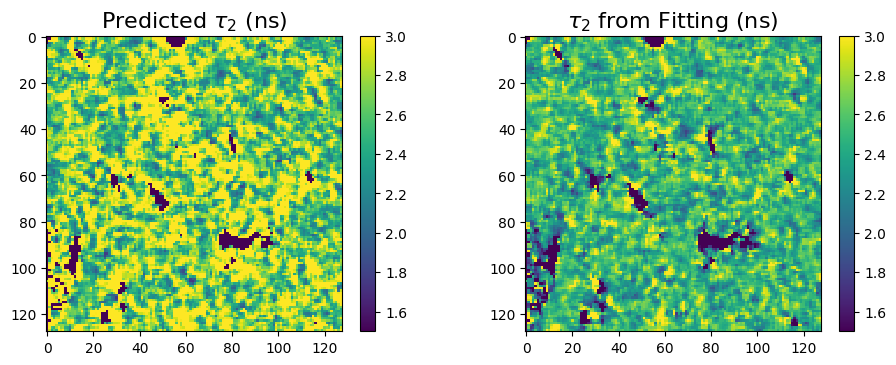

In [ ]:

fig = plt.figure(figsize=(10,10))
# Predicted tau2
ax3 = fig.add_subplot(3,2,3)
im3 = ax3.imshow(stitched_image_2, cmap='viridis', interpolation='nearest', vmin=1.5, vmax=3)
ax3.set_title(r'Predicted $\tau_2$ (ns)', fontsize = 16)
fig.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)


# G.T. tau2
ax4 = fig.add_subplot(3,2,4)
im4 = ax4.imshow(loaded_data_2, cmap='viridis', interpolation='nearest', vmin=1.5, vmax=3)
ax4.set_title(r'$\tau_2$ from Fitting (ns)', fontsize = 16)
fig.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)


plt.tight_layout()
plt.show()


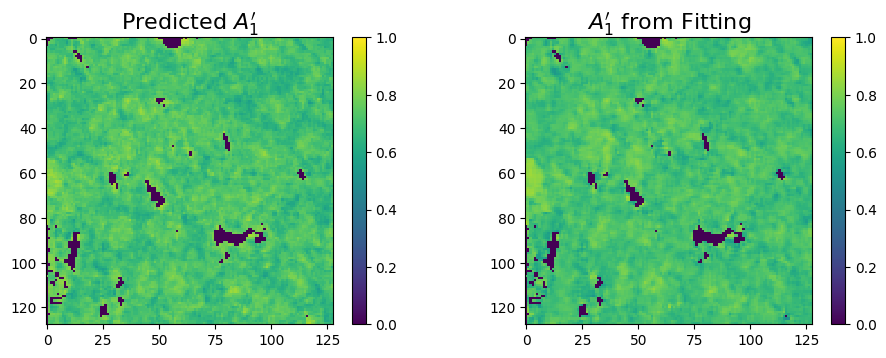

In [ ]:

fig = plt.figure(figsize=(10,10))

# Predicted AR
ax5 = fig.add_subplot(3,2,5)
im5 = ax5.imshow(stitched_image_3, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
ax5.set_title(r"Predicted $A_1'$" , fontsize = 16)
fig.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04)


# G.T. tau1
ax6 = fig.add_subplot(3,2,6)
im6 = ax6.imshow(loaded_data_a1, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
ax6.set_title(r"$A_1'$ from Fitting" , fontsize = 16)
fig.colorbar(im6, ax=ax6, fraction=0.046, pad=0.04)



plt.tight_layout()
plt.show()

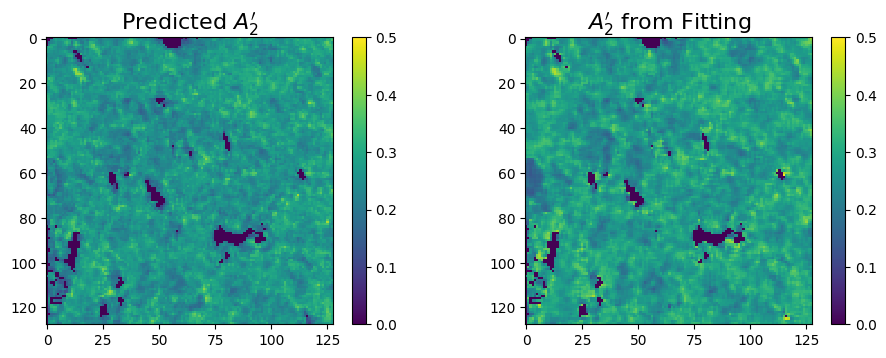

In [ ]:

fig = plt.figure(figsize=(10,10))

# Predicted AR
ax5 = fig.add_subplot(3,2,5)
im5 = ax5.imshow(stitched_image_4, cmap='viridis', interpolation='nearest', vmin=0.0, vmax=0.5)
ax5.set_title(r"Predicted $A_2'$", fontsize = 16)
fig.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04)
# G.T. tau1
ax6 = fig.add_subplot(3,2,6)
im6 = ax6.imshow(loaded_data_a2, cmap='viridis', interpolation='nearest', vmin=0.0, vmax=0.5)
ax6.set_title(r"$A_2'$ from Fitting", fontsize = 16)
fig.colorbar(im6, ax=ax6, fraction=0.046, pad=0.04)



plt.tight_layout()
plt.show()

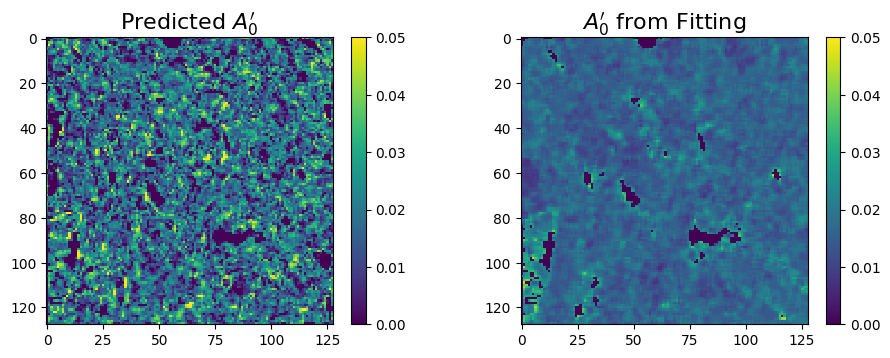

In [ ]:

fig = plt.figure(figsize=(10,10))

# Predicted AR
ax5 = fig.add_subplot(3,2,5)
im5 = ax5.imshow(stitched_image_5, cmap='viridis', interpolation='nearest', vmin=0.0, vmax=0.05)
ax5.set_title(r"Predicted $A_0'$", fontsize = 16)
fig.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04)
# G.T. tau1
ax6 = fig.add_subplot(3,2,6)
im6 = ax6.imshow(loaded_data_offset, cmap='viridis', interpolation='nearest', vmin=0.0, vmax=0.05)
ax6.set_title(r"$A_0'$ from Fitting", fontsize = 16)
fig.colorbar(im6, ax=ax6, fraction=0.046, pad=0.04)



plt.tight_layout()
plt.show()

In [ ]:
stiched_image_5 = stitched_image_5.astype(np.float64)  # Convert im1 to float64

ssim_score = compare_ssim(loaded_data_offset, stiched_image_5, data_range=stiched_image_5.max() - stiched_image_5.min())

print(f"SSIM for the image is: {ssim_score}")

SSIM for the image is: 0.22000907519078347
